# Visualisasi data covid-19

Matplotlib dari python dapat digunakan untuk menggambarkan kondisi terkini persebaran covid-19 di seluruh dunia. Tutorial ini hanya merupakan salinan dari [alamat ini.](https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a) 

## Loading data

Data covid-19 yang digunakan dalam tutorial ini berasal dari [situs ini.](https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv) Update data dilakukan setiap hari. Langkah pertama yang dilakukan adalah memanggil data dari situs tersebut di atas. Selanjutnya ubah data ke bentuk dataframe, pilih data yang ingin ditampilkan lalu buat ringkasan datanya.

In [15]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Indonesia', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

## Mempersiapkan dataframe untuk visualisasi

In [16]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Indonesia': 273523615, 'Germany': 83783942 , 'United Kingdom': 67886011 , 'US': 331002651, 'France': 65273511, 'China':1439323776}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Data populasi negara-negara dapat dilihat [disini](https://www.worldometers.info/world-population/population-by-country/).

## Buat visualisasi

Text(2020-01-23 00:00:00, 696265, 'For the USA, China, Germany, France, United Kingdom, and Indonesia\nIncludes Current Cases, Recoveries, and Deaths')

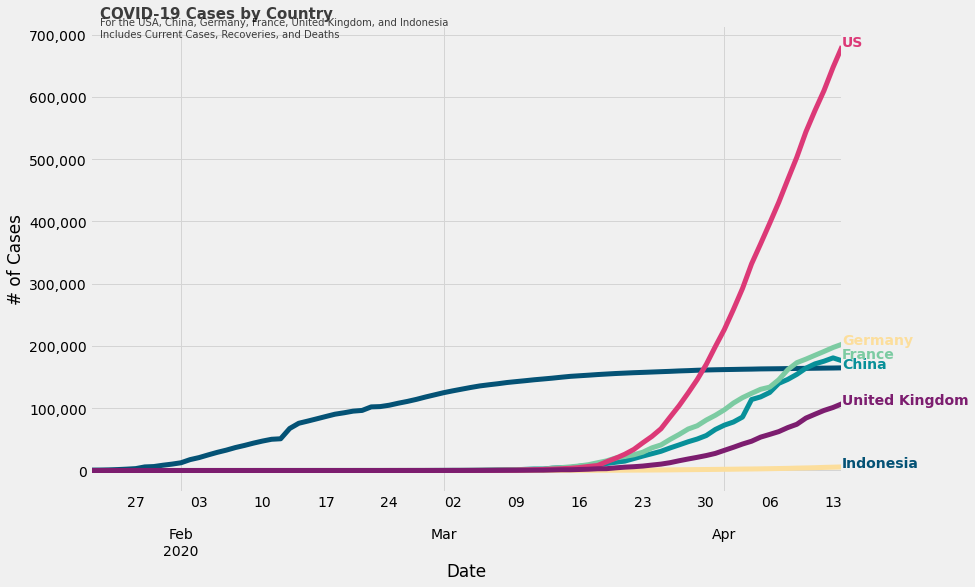

In [30]:
# Section 6 - Generating Colours and Style
colors = {'Indonesia':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 15, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Indonesia\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 10, alpha = .75)
# plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

Text(2020-01-23 00:00:00, 287.0833025972818, 'For the USA, China, Germany, France, United Kingdom, and Indonesia\nIncludes Current Cases, Recoveries, and Deaths')

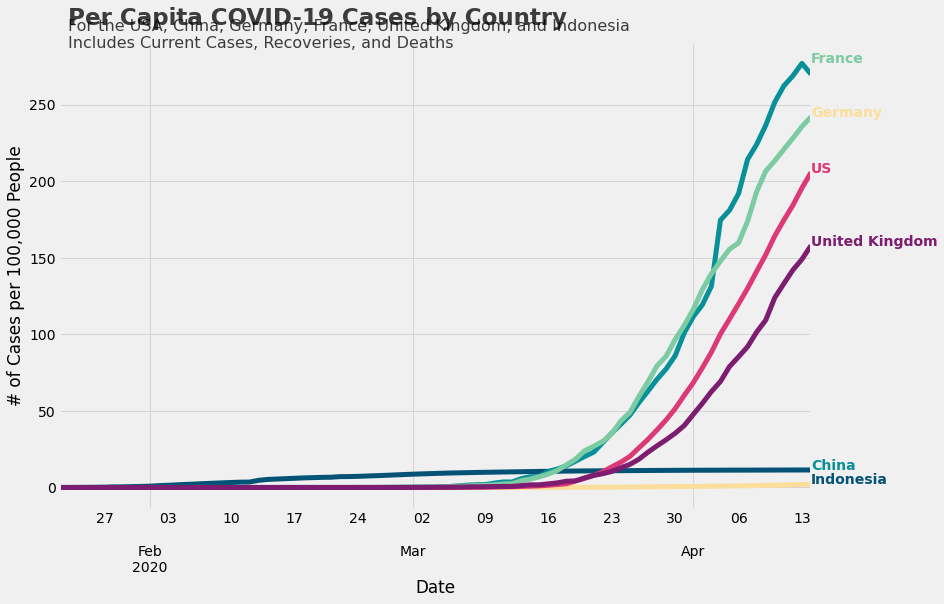

In [21]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Indonesia\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
# percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)